# In this Notebook

I will explore the data from my personal Goodreads account, where I have documented every book I have read for the past few years and what I rated it. I will use this Notebook to answer some questions I have about my reading habits and to visualize trends in my book ratings and reading experiences.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.set_palette('Accent')


%matplotlib inline 

# Step 1 - Import & inspect the data

In [2]:
goodreads = pd.read_csv('goodreads_clean_export.csv')
goodreads.head()

,Book Id,Title,Author l-f,Date Read,My Rating,Average Rating,Publisher,Number of Pages,Original Publication Year
0,29751398,The Power,"Alderman, Naomi",2019/4/11,4,3.82,Viking,341,2016.0
1,425452,Le voyageur sans bagage,"Anouilh, Jean",2019/7/21,4,3.70,Gallimard,218,1937.0
2,29093326,What Light,"Asher, Jay",2019/2/10,2,3.58,Razorbill,251,2016.0
3,15790842,"Life After Life (Todd Family, #1)","Atkinson, Kate",2019/6/21,2,3.76,Reagan Arthur Books,531,2013.0
4,42975172,The Testaments,"Atwood, Margaret",2020/1/3,4,4.21,Nan A. Talese,422,2019.0


In [3]:
goodreads.columns.values

array(['Book Id', 'Title', 'Author l-f', 'Date Read', 'My Rating',
       'Average Rating', 'Publisher', 'Number of Pages',
       'Original Publication Year'], dtype=object)

In [4]:
goodreads['Date Read'] = pd.to_datetime(goodreads['Date Read'])

# Step 2 - Questions

Here are the questions I would like to answer with this data:
1. How many books did I read each year?
2. Is there any particular trend in the number of books I read per year? Am I reading increasingly more?
3. How do my ratings compare to "average" ratings?
4. How many books do I read of each size? Do I read shorter or longer books, usually?
5. Do I tend to read more or less during certain months?

In [5]:
# Question 1 - How many books did I read each year?

grouped_by_year = goodreads.groupby(goodreads['Date Read'].dt.year).Title.count().reset_index()
grouped_by_year

,Date Read,Title
0,2012,1
1,2016,8
2,2017,30
3,2018,30
4,2019,35
5,2020,10


In [6]:
# To visualize this data, I will drop the years 2012 and 2016 - I was not consistently using Goodreads during 
# those years. I will keep 2020, but it is important to note that 2020 is the current year, and it is only May.

grouped_by_year.drop([0,1],inplace=True)

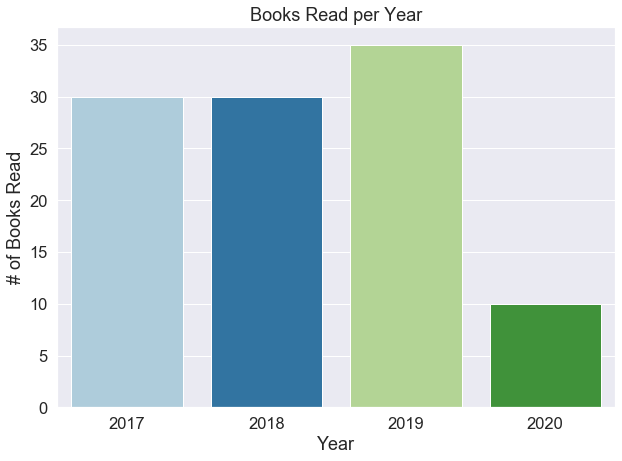

In [7]:
sns.set(font_scale=1.5)
sns.set_palette('Paired')

plt.figure(figsize=(10,7))

bar = sns.barplot(x='Date Read', y='Title', data=grouped_by_year)
bar.set(xlabel='Year',ylabel='# of Books Read')
bar.set(title='Books Read per Year')
plt.show()

In [8]:
# Question 2 - Is there any particular trend in the number of books I read per year? Am I reading increasingly more?

# I will split the data by year and month, then visualize my reading per year as a line graph
books_2017 = goodreads[goodreads['Date Read'].dt.year == 2017]
books_2017 = books_2017.groupby(books_2017['Date Read'].dt.month).Title.count().reset_index()
books_2017['Title'] = books_2017['Title'].cumsum()

books_2018 = goodreads[goodreads['Date Read'].dt.year == 2018]
books_2018 = books_2018.groupby(books_2018['Date Read'].dt.month).Title.count().reset_index()
books_2018['Title'] = books_2018['Title'].cumsum()

books_2019 = goodreads[goodreads['Date Read'].dt.year == 2019]
books_2019 = books_2019.groupby(books_2019['Date Read'].dt.month).Title.count().reset_index()
books_2019['Title'] = books_2019['Title'].cumsum()

books_2020 = goodreads[goodreads['Date Read'].dt.year == 2020]
books_2020 = books_2020.groupby(books_2020['Date Read'].dt.month).Title.count().reset_index()
books_2020['Title'] = books_2020['Title'].cumsum()

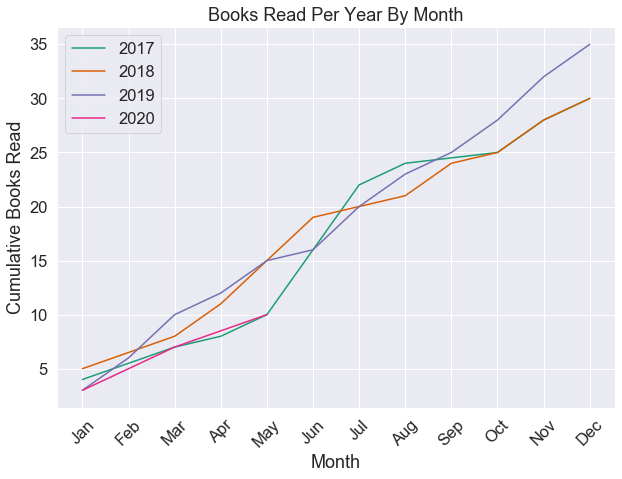

In [24]:
sns.set(font_scale=1.5)
sns.set_palette('Dark2')

plt.figure(figsize=(10,7))

x_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

monthly_book_count = sns.lineplot(x='Date Read', y='Title', data=books_2017)
sns.lineplot(x='Date Read', y='Title', data=books_2018)
sns.lineplot(x='Date Read', y='Title', data=books_2019)
sns.lineplot(x='Date Read', y='Title', data=books_2020)
monthly_book_count.set(xticks=range(1,13))
monthly_book_count.set_xticklabels(x_labels, rotation=45)
monthly_book_count.set(xlabel='Month',ylabel='Cumulative Books Read')
monthly_book_count.set(title='Books Read Per Year By Month')
monthly_book_count.legend(labels=['2017','2018','2019','2020'])
plt.show()

In [31]:
# Question 3 - How do my ratings compare to "average" ratings?
# First, since my ratings are all integers, I want to make all of the Goodreads ratings integers too, for easier 
# comparison.
goodreads['Average Int Rating'] = goodreads['Average Rating'].apply(lambda x: int(x))

In [43]:
my_ratings = goodreads.groupby(['My Rating']).Title.count().reset_index()
avg_ratings = goodreads.groupby(['Average Int Rating']).Title.count().reset_index()

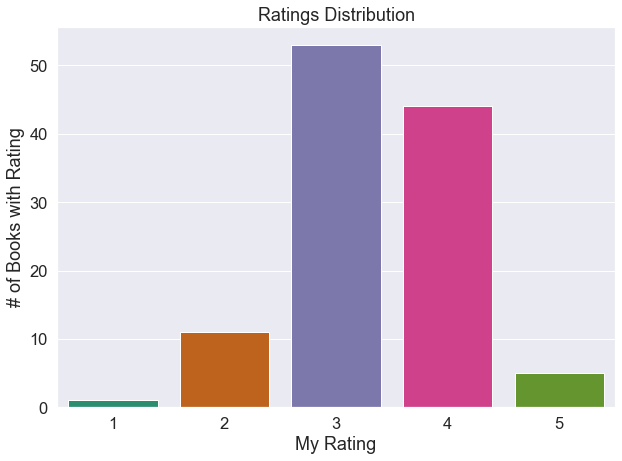

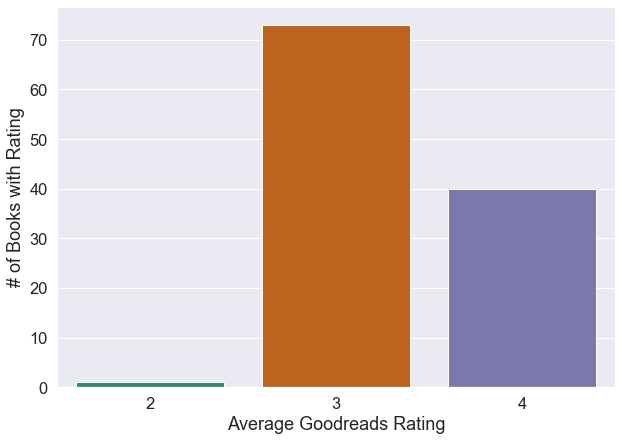

In [66]:
sns.set(font_scale=1.5)
sns.set_palette('Dark2')

plt.figure(figsize=(10,7))
my = sns.barplot(x='My Rating', y='Title', data=my_ratings)
my.set(ylabel='# of Books with Rating')
my.set(title='Ratings Distribution')
plt.figure(figsize=(10,7))
avg = sns.barplot(x='Average Int Rating', y='Title', data=avg_ratings)
avg.set(xlabel='Average Goodreads Rating', ylabel='# of Books with Rating')
plt.show()

In [50]:
# Question 4 - How many books do I read of each size? Do I read shorter or longer books, usually?
# First, I want to see what my largest and smallest books are, to get an idea of number of bins and bin size
print(goodreads['Number of Pages'].min())
print(goodreads['Number of Pages'].max())

10
1088


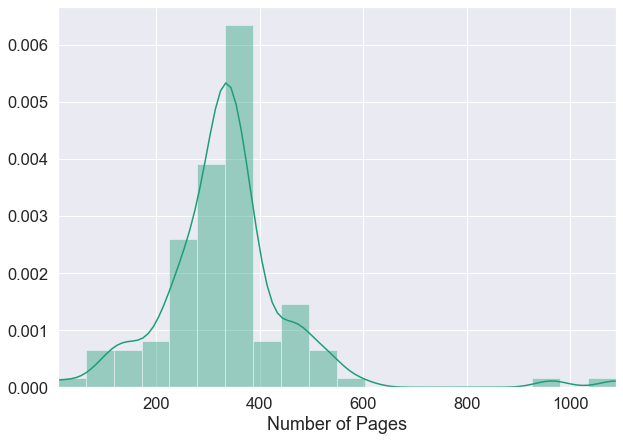

In [67]:
sns.set(font_scale=1.5)
sns.set_palette('Dark2')

plt.figure(figsize=(10,7))

book_size = sns.distplot(goodreads['Number of Pages'], bins=20)
plt.xlim(10,1088)
plt.show()

In [62]:
# Question 5 - Do I tend to read more or less during certain months?

by_month = goodreads.groupby(goodreads['Date Read'].dt.month).Title.count().reset_index()

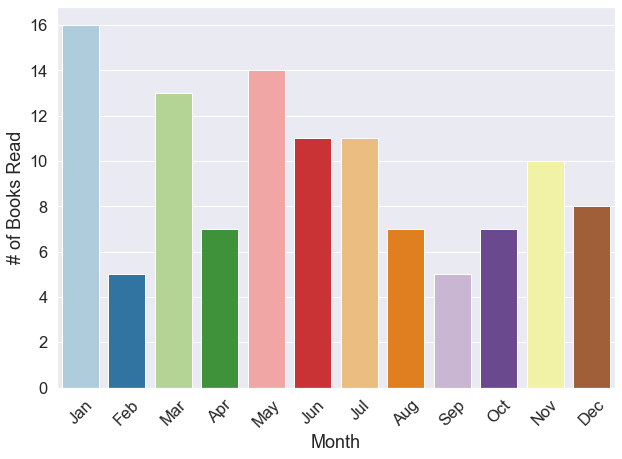

In [64]:
sns.set(font_scale=1.5)
sns.set_palette('Paired')

plt.figure(figsize=(10,7))
x_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_bar = sns.barplot(x='Date Read', y='Title', data=by_month)
month_bar.set(xlabel='Month',ylabel='# of Books Read')
month_bar.set_xticklabels(x_labels, rotation=45)
bar.set(title='Books Read by Month')
plt.show()
